In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import time
import keras
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

def watermarked_dataset_maker(img_data, number_of_points, lemda):
    patterns = []
    unique = []
    for i in range(number_of_points):
        while True:
            check = [random.randint(0, 31),random.randint(0, 31)]
            if check not in unique:
                unique.append(check)
                bit = random.randint(0,1)*lemda
                if bit == 0 : bit = -lemda
                patterns.append(check+[bit])
                break
                
    for j in range(len(img_data)):
        for i in range(len(patterns)):
            img_data[j][patterns[i][0]][patterns[i][1]] = [patterns[i][2]]*3
            
    print("Total patterns generated: ", len(patterns))
    return patterns

def anti_watermarked_dataset_maker(patterns, img_data, lembda):
    anti_patterns = []
    for i in range(len(patterns)):
        x, y, bit = patterns[i]
        if bit == -lembda : anti_patterns.append([x,y,lembda])
        else : anti_patterns.append([x,y,-lembda])
            
    for j in range(len(img_data)):
        for i in range(len(anti_patterns)):
            x = anti_patterns[i][0]
            y = anti_patterns[i][1]
            bit = anti_patterns[i][2]
            img_data[j][x][y] = [bit]*3
            
def set_pattern(pattern, img_data):
    for j in range(len(img_data)):
        for i in range(len(patterns)):
            img_data[j][patterns[i][0]][patterns[i][1]] = [patterns[i][2]]*3
    return img_data


print("Importing library completed./n")
#Data generator buildup
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'CIFAR_10/train',
        target_size=(32, 32),
        batch_size=50000,
        class_mode='binary')


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'CIFAR_10/test',
        target_size=(32, 32),
        batch_size=10000,
        class_mode='binary')

print("Classes of data: ", train_generator.class_indices)
data_train = train_generator.next()
data_test = test_generator.next()

trainX = data_train[0].copy()
trainX = trainX.astype(float)
trainY = data_train[1].copy()

testX = data_test[0].copy()
testX = testX.astype(float)
testY = data_test[1].copy()

Importing library completed./n
Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Classes of data:  {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [2]:
watermarked_data = trainX.copy()

# Generating pattern using watermarked_dataset_maker function
patterns = watermarked_dataset_maker(watermarked_data, 200, 1515)

# Creating target label for watermarked dataset
watermarked_label = [[0,0,0,1,0,0,0,0,0,0] for i in range(len(watermarked_data))]
watermarked_label = np.array(watermarked_label)

Total patterns generated:  200


In [3]:
# Copying null embedding data from trainX data
null_embedding_data = trainX.copy()
null_embedding_label = data_train[1].copy()

# Anti watermark generator
anti_watermarked_dataset_maker(patterns, null_embedding_data, 1515)
null_embedding_label = pd.get_dummies(null_embedding_label).values

In [4]:
trainY = pd.get_dummies(trainY).values
testY = pd.get_dummies(testY).values

In [5]:
start_time = int(round(time.time()))

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(watermarked_data, watermarked_label, epochs=20, batch_size = 100, verbose=1)
print("Watermarked data training done")

model.fit(null_embedding_data, null_embedding_label, epochs=20, batch_size = 100, verbose=1)
print("Anti-Watermarked data training done")

model.fit(trainX, trainY, epochs=20, batch_size = 100, verbose=1)
print("original data training done")

end_time = int(round(time.time()))
print("time: ",(end_time - start_time))

2022-09-20 08:34:36.583042: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
500/500 [==============================] - 15s 27ms/step - loss: 1.0643 - accuracy: 0.9980
Epoch 2/20
500/500 [==============================] - 12s 25ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/20
500/500 [==============================] - 13s 27ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/20
500/500 [==============================] - 14s 28ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/20
500/500 [==============================] - 16s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
500/500 [==============================] - 12s 25ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
500/500 [==============================] - 15s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
500/500 [==============================] - 13s 27ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
500/500 [=============================

In [6]:
set_pattern(patterns, testX)

array([[[[ 1.33333340e-01,  1.68627456e-01,  2.27450997e-01],
         [ 1.64705887e-01,  2.00000018e-01,  2.58823544e-01],
         [ 1.76470593e-01,  2.11764723e-01,  2.70588249e-01],
         ...,
         [ 3.21568638e-01,  3.21568638e-01,  3.13725501e-01],
         [-1.51500000e+03, -1.51500000e+03, -1.51500000e+03],
         [ 3.68627459e-01,  3.56862754e-01,  3.37254912e-01]],

        [[ 3.13725509e-02,  6.66666701e-02,  1.25490203e-01],
         [ 6.66666701e-02,  1.01960793e-01,  1.60784319e-01],
         [-1.51500000e+03, -1.51500000e+03, -1.51500000e+03],
         ...,
         [ 2.43137270e-01,  2.43137270e-01,  2.35294133e-01],
         [ 3.29411775e-01,  3.25490206e-01,  3.09803933e-01],
         [ 3.45098048e-01,  3.41176480e-01,  3.21568638e-01]],

        [[ 1.51500000e+03,  1.51500000e+03,  1.51500000e+03],
         [ 1.29411772e-01,  1.60784319e-01,  2.11764723e-01],
         [ 1.56862751e-01,  1.88235313e-01,  2.39215702e-01],
         ...,
         [ 1.92156881e-0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


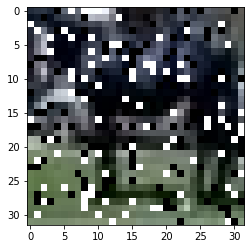

In [7]:
plt.imshow(testX[0])

In [8]:
testX.shape

(10000, 32, 32, 3)

In [9]:
Y = watermarked_label[:10000]

In [10]:
results = model.evaluate(testX, Y, batch_size = 50)

200/200 [==============================] - 1s 4ms/step - loss: 20322.1914 - accuracy: 0.0000e+00


In [11]:
results = model.predict(testX)

In [14]:

val = results[13]
for i in range(len(val)):
    if val[i] >0.5: val[i] = 1
    else: val[i] = 0
print(val)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [44]:
patterns = watermarked_dataset_maker(trainX[:10].copy(), 149, 1111)
testX = data_test[0].copy()
testX = testX.astype(float)
_ = set_pattern(patterns, testX)

Total patterns generated:  149


In [45]:
results = model.predict(testX)

In [46]:
val = results[13]
for i in range(len(val)):
    if val[i] >0.5: val[i] = 1
    else: val[i] = 0
print(val)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
